# EIS

This example demonstrates how to use the EZ module to fit an equivalent circuit to an impedance vs angular frequency response, measured experimentally at different applied bias. In this example electrochemical impedance spectroscopy (EIS) data is used.

<p id="EC-def"></p>

### Equivalent circuit definition

An equivalent circuit can be defined using the classes **R, C, Q** and **W**. **R** correspond to a resistance, **C** a capacitance, **Q** a constant phase element and **W** a Warburg element. In this example we only use **R** and **Q**. We initialize all the elements in the circuit with a unique label:

In [1]:
from EZ.model import Q, R

R_sol = R("S")
R_b = R("Bulk")
Q_b = Q("SC")
R_s = R("SS")
Q_s = Q("SS")

Then we can define a model equivalent circuit using these elements. Adding elements is equivalent to connecting them in series and dividing elements is equivalent to connecting them in parallel. Blocks of elements can be constituted using parentheses. 

In [2]:
model = R_sol + Q_b/(R_b + Q_s/R_s)

The circuit can be displayed using its **print** method:

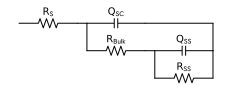

In [3]:
model.print()

<p id="EC-eval"></p>

### Evaluation of the equivalent circuit impedance vs frequency behavior

It is possible to evaluate the defined equivalent circuit impedance vs frequency characteristics. To this mean we need to initialize the parameters of the elements (R and Q) defined above. Depending on the kind of element a different number of parameter has to be initialized. A resistance for example has one parameter, its resistance value, named with "R_" and the label of the considered element. A constant phase element has two parameters, a pseudo-capacitance ("Q_" + label) and a non-ideality factor ("n_" + label). All the parameters are initialized using a dictionary whose keys are the parameter name and whose values are dictionnaries holding the variables used for initialization. These variables have to contain a value and can contain additional information on the parameter that will be used at the fitting step.

<p id="pars-def"></p>

In [4]:
pars = {
    "R_S":    dict(value = 0.025, vary = False),
    "R_Bulk": dict(value = 10, min = 0),
    "R_SS":   dict(value = 50, min = 0),
    "Q_SC":   dict(value = 1e-3, min = 0),
    "Q_SS":   dict(value = 1e-2, min = 0),
    "n_SC":   dict(value = 0.9, vary = False),
    "n_SS":   dict(value = 0.8, vary = False)
}

The model impedance vs frequency is evaluated and displayed in Bode and Nyquist plots using its **plot** method. A range of frequencies can be passed via the **range_omega** argument. Moreover, a list of additional circuits can be passed via the **partial_models** argument. These models impedances are overlayed in the Bode plots order to vizualise the contribution of some components to the overall impedance characteristic. In the Nyquist plot the regions of the impedance where the partial circuit' imaginary part is larger are highlighted with a corresponding color. Here for example we use this visualization to show the parts of the circuit influencing respectively the low and high frequencies responses, corresponding respectively to the surface and bulk of an electrode.

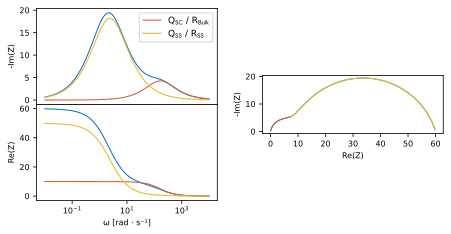

In [5]:
model.plot(
    partial_models=[Q_b/R_b, Q_s/R_s],
    pars=pars,
    range_omega = [1e-2, 1e4]
)

<p id="load-plot"></p>

### Loading and plotting the EIS data

Data loading, plotting and fitting is done using an object of class **Dataset**. This object initialization requires at least the path to the folder where the files are stored. To be loaded  these files should be formatted properly. The files used in this example can be found [here](https://github.com/flboudoire/EZ/tree/master/examples/data/EIS%20CFO%20pH14%20light), and the details on how to format the files for proper loading are documented [here](files.html). Optional argument passed in this example are the pH to convert to RHE and electrode area to normalize the impedance.

In [6]:
from EZ.data import Dataset

ds = Dataset(
    folder="data/EIS CFO pH14 light",
    pH=14,
    area=0.25
)

In this example we recorded the impedance at frequencies up to 10 MHz. Since there is no relevant impedance trend above 10 kHz change the dataset range of frequencies using the set_freq_range method. Then the dataset is plotted using the plot method.

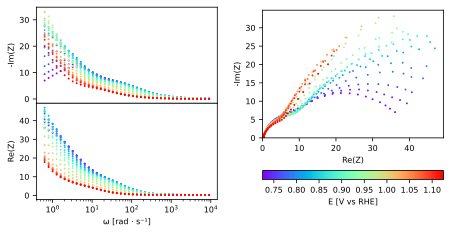

In [7]:
ds.set_freq_range([1e-10, 1e4])
ds.plot()

### Fitting and exporting fit results

The fit is performed using the **fit** method. This method requires two arguments, the model used for the fit, defined here as an [equivalent circuit](#EC-def), and a dictionary setting the model parameters initial guess and constraints. In this dictionnary, declared [previously](#pars-def), we fixed some parameters (**R_S**, **n_SC** and **n_SS**) by setting the variable **vary** to **False**. We also set the remaining parameters to be positive by setting the variable **min** to 0. Maximum values could be used also using the variable **max**.

In [8]:
ds.fit(model, pars=pars)

Once the fit is performed using the **plot** method also displays an evaluation of the fit as a line of the same color as the corresponding data:

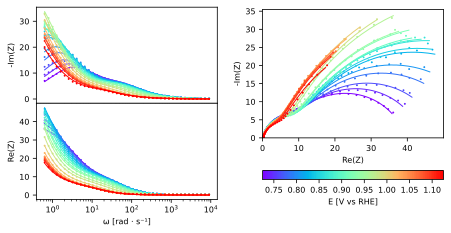

In [9]:
ds.plot()

The raw data and corresponding fit can be exported using the **export** method. The resulting exported files for this example can be consulted [here](https://github.com/flboudoire/EZ/tree/master/examples/data/EIS%20CFO%20pH14%20light%20-%20analysis).

In [10]:
ds.export()

The parameters fitted value and standard error can be exported using the **export_result** method.  The resulting exported file for this example can be consulted [here](https://github.com/flboudoire/EZ/tree/master/examples/data/EIS%20CFO%20pH14%20light%20-%20fit%20results). Passing the argument **show=True** to this method also displays these values as shown below.

In [11]:
ds.export_result(show=True)

,value (fixed)
R_S,0.025
n_SC,0.900
n_SS,0.800


E [V vs RHE],Q_SC,Q_SC std,R_Bulk,R_Bulk std,Q_SS,Q_SS std,R_SS,R_SS std
0.725,0.00226,2.18e-05,13.4,0.151,0.0132,0.000166,26.1,0.149
0.745,0.00213,3.02e-05,13.7,0.199,0.0142,0.000215,30.5,0.206
0.765,0.00208,3.51e-05,14.1,0.219,0.0154,0.000235,35.3,0.248
0.785,0.00204,3.73e-05,13.5,0.21,0.0155,0.000192,43.6,0.277
0.805,0.00207,6.17e-05,13,0.317,0.0159,0.000264,50.1,0.48
0.825,0.00214,4.25e-05,13.7,0.209,0.0174,0.000173,60,0.424
0.845,0.00224,5.91e-05,13.2,0.264,0.0181,0.000222,63.1,0.602
0.865,0.00231,4.66e-05,12.6,0.189,0.0187,0.000156,69.2,0.513
0.885,0.00252,4.85e-05,13.1,0.187,0.0207,0.000176,70.4,0.595
0.905,0.00277,5.82e-05,13.1,0.205,0.0228,0.000217,72.5,0.783
